
<p>
<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*mnxrPjQxlHBdty3ZiVW8iw.png" width="%"></p>

Você já teve seu cartão clonado ou soube de alguém que teve? Talvez já tenha recebido mensagens falsas tentando roubar seus dados ou, ao tentar fazer uma compra, teve seu cartão bloqueado preventivamente pelo banco. Se identificou?

Nesse artigo vamos abordar esses temas, e mostrar na prática como Machine Learning pode ajudar nessas questões.

## **Tipos Comuns de Fraude**

Clonagem de cartão, geração de números falsos, ligações e mensagens enganosas para roubo de dados... As táticas são muitas. ([**O maior índice de fraudes envolvendo cartões de crédito se dá em transações pela internet e telefone**](https://www.mundodastribos.com/paises-com-mais-fraudes-envolvendo-cartoes-de-credito.html)). E a cada dia, novas técnicas surgem. No entanto, a tecnologia também evolui. E é aqui que entra o **Machine Learning**.

Machine Learning, ou Aprendizado de Máquina, é uma tecnologia que permite que sistemas aprendam com dados, identifiquem padrões e tomem decisões com mínima intervenção humana. E é essa tecnologia que muitas instituições financeiras estão adotando para detectar e prevenir fraudes em cartões de crédito.

## **Impacto Financeiro de Bilhões**

- As fraudes financeiras, particularmente aquelas envolvendo cartões de crédito, provocam um prejuízo significativo, ultrapassando a marca de mais de **R$ 1,8 bilhão por ano** no Brasil.



## **Extensão do Problema**

- Em 2023, somente no Brasil, foram registradas e [**evitadas cerca de R$ 6,2 bilhões de transações potencialmente fraudulentas**](https://blog.konduto.com/censo-da-fraude-2023/). Este valor é um indicativo do potencial financeiro das operações fraudulentas e do impacto positivo que a prevenção eficaz pode ter.

## **Soluções Potenciais**

- Para mitigar o risco e o impacto das fraudes, as instituições financeiras podem investir em **processos robustos de validação de identidade** e em **tecnologias de detecção de fraude**, como aprendizado de máquina e algoritmos especializados.

Agora, vamos embarcar na análise de um projeto focado na **identificação de fraudes em cartões de crédito utilizando Machine Learning.**

Em nosso estudo, importamos um conjunto de dados que contém transações, algumas delas fraudulentas. Com esses dados em mãos, podemos treinar modelos de Machine Learning para identificar padrões associados a transações fraudulentas.



# **Importando os Dados**
Este conjunto de dados possui transações feitas por titulares de cartões europeus em 2013, e teve como objetivo geral analisar dados de mais de 280 mil transações em cartões de crédito. Está altamente desbalanceado, com apenas **0,17% das transações sendo fraudulentas**.

Para tratar conjuntos de dados que não estão equilibrados, é essencial adotar medidas específicas antes de desenvolver o modelo. Sem essa etapa, o modelo terá alta eficácia em prever transações válidas, mas falhará em detectar fraudes. E o principal objetivo deste estudo é precisamente identificar transações fraudulentas.

Além do desbalanceamento, todas as características (features) dentro do conjunto de dados são numéricas, e estão representadas como [V1, V2, V3..., V28], com os nomes das colunas **descaracterizados** por razões de segurança e integridade dos dados

[**Na página original dos dados**](https://www.kaggle.com/mlg-ulb/creditcardfraud), é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

# **Observação:**
A **[Análise de Componentes Principais (PCA)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html)** é uma técnica que simplifica um grande conjunto de dados para poucas informações essenciais, mantendo a principal essência dos dados. Imagine que você tem uma caixa cheia de diferentes brinquedos; o PCA é como encontrar poucos brinquedos que representam a diversão geral da caixa toda, tornando-a mais fácil de carregar. Vamos começar!


In [ ]:
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# importar os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style()
%matplotlib inline
# Importando a biblioteca scikit-plot, que é uma extensão do Matplotlib para criar rapidamente gráficos comuns usados em machine learning.
import scikitplot as skplt


# - Importando métricas específicas da biblioteca scikit-learn:
# - roc_auc_score: Calcula a área sob a curva ROC (AUC-ROC), que é uma métrica para avaliação de desempenho de modelos de classificação binária.
# - roc_curve: Calcula a curva ROC, que é uma representação gráfica da taxa de verdadeiros positivos contra a taxa de falsos positivos em vários limiares.
# - accuracy_score: Calcula a acurácia do modelo, que é uma métrica básica indicando a proporção de instâncias corretamente previstas em relação ao total de instâncias.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression

# Importando o RandomUnderSampler da biblioteca imbalanced-learn (imblearn).
# O RandomUnderSampler é uma técnica de subamostragem que visa equilibrar a distribuição de classes
# eliminando aleatoriamente alguns dos exemplos da classe majoritária. Isso é útil especialmente
# quando temos um conjunto de dados desequilibrado, onde uma classe tem muitos mais exemplos do que a outra.
from imblearn.under_sampling import RandomUnderSampler


# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

Para facilitar a aquisição dos dados, acesse o *link* do `csv`.

In [ ]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

## Análise Exploratória

Antes de mergulharmos nos modelos de Machine Learning, é crucial entender e preparar nossos dados. Assim como você não construiria uma casa sem verificar a qualidade dos materiais, não podemos construir um modelo sem garantir que nossos dados estejam em boa forma.
Vamos identificar as informações relevantes iniciais que os dados possuem

In [ ]:
# Visualizando as 5 primeiras entradas
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Vendo a quantidade de linhas/entradas e colunas do DataFrame
df.shape

(284807, 31)

In [ ]:
# Obtendo o formato dos dados, informações de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Como podemos analisar, o conjunto de dados possui 31 colunas e 284807 linhas, entradas.

1. **Time:** Tempo em segundos entre cada transação

2. **V1 a V28:** São características resultantes de uma transformação PCA (Principal Component Analysis). A transformação PCA é frequentemente usada em dados sensíveis, como dados bancários, para anonimizar informações originais do
conjunto de dados.
  
3. **Amount:** Quantia da transação.
4. **Class:** Esta é a variável alvo. Parece ser uma variável binária onde 0 indica uma transação normal e 1 indica uma transação fraudulenta.

Dado esse entendimento inicial, vamos explorar algumas estatísticas básicas do conjunto de dados para obter uma melhor compreensão.

In [ ]:
# Visualizando dados estatísticos de cada coluna
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [ ]:
# Observando a frequência para fraudes e não fraudes e confirmando a porcentagem informado na introdução desse projeto
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
fraction = len(fraud)/float(len(valid))

print(fraction)
print("Casos de Fraude: {}".format(len(df[df['Class'] == 1])))
print("Casos válidos: {}".format(len(df[df['Class'] == 0])))

0.0017304750013189597
Casos de Fraude: 492
Casos válidos: 284315


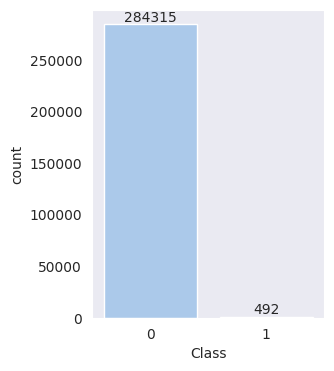

In [ ]:
# Utilizando um gráfico para a visualização do que foi observado acima sobre o desbalanceamento
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Aqui estão algumas observações iniciais:

1. **Características PCA (V1 a V28)**: A média dessas características é muito próxima de zero, o que é esperado após a transformação PCA. Além disso, os valores dessas características variam amplamente, com alguns valores extremamente grandes em magnitude, tanto positivos quanto negativos.
2. **Tempo**: O tempo mínimo é 0 (que representa a primeira transação) e o tempo máximo é 172792 segundos, que é equivalente a cerca de 2 dias.
3. **Quantia**: A quantia média da transação é de aproximadamente 88.35, mas a mediana é apenas 22, indicando a presença de valores muito altos puxando a média para cima. A quantia máxima da transação é de 25691.16.
4. **Classe**: O conjunto de dados é altamente desequilibrado. Aproximadamente 99.83% das transações são não-fraudulentas (Classe = 0) enquanto apenas cerca de 0.17% são fraudulentas (Classe = 1).

Dado o desequilíbrio nas classes, devemos ter cuidado ao escolher a métrica de avaliação ao treinar um modelo de aprendizado de máquina. A acurácia, por exemplo, não seria uma boa métrica, pois um modelo que sempre prevê "não-fraudulento" obteria uma acurácia de quase 99.83%, mas seria inútil na prática.

Antes de prosseguirmos para a modelagem, vamos realizar uma análise exploratória mais aprofundada, visualizando algumas das características para obter insights adicionais.



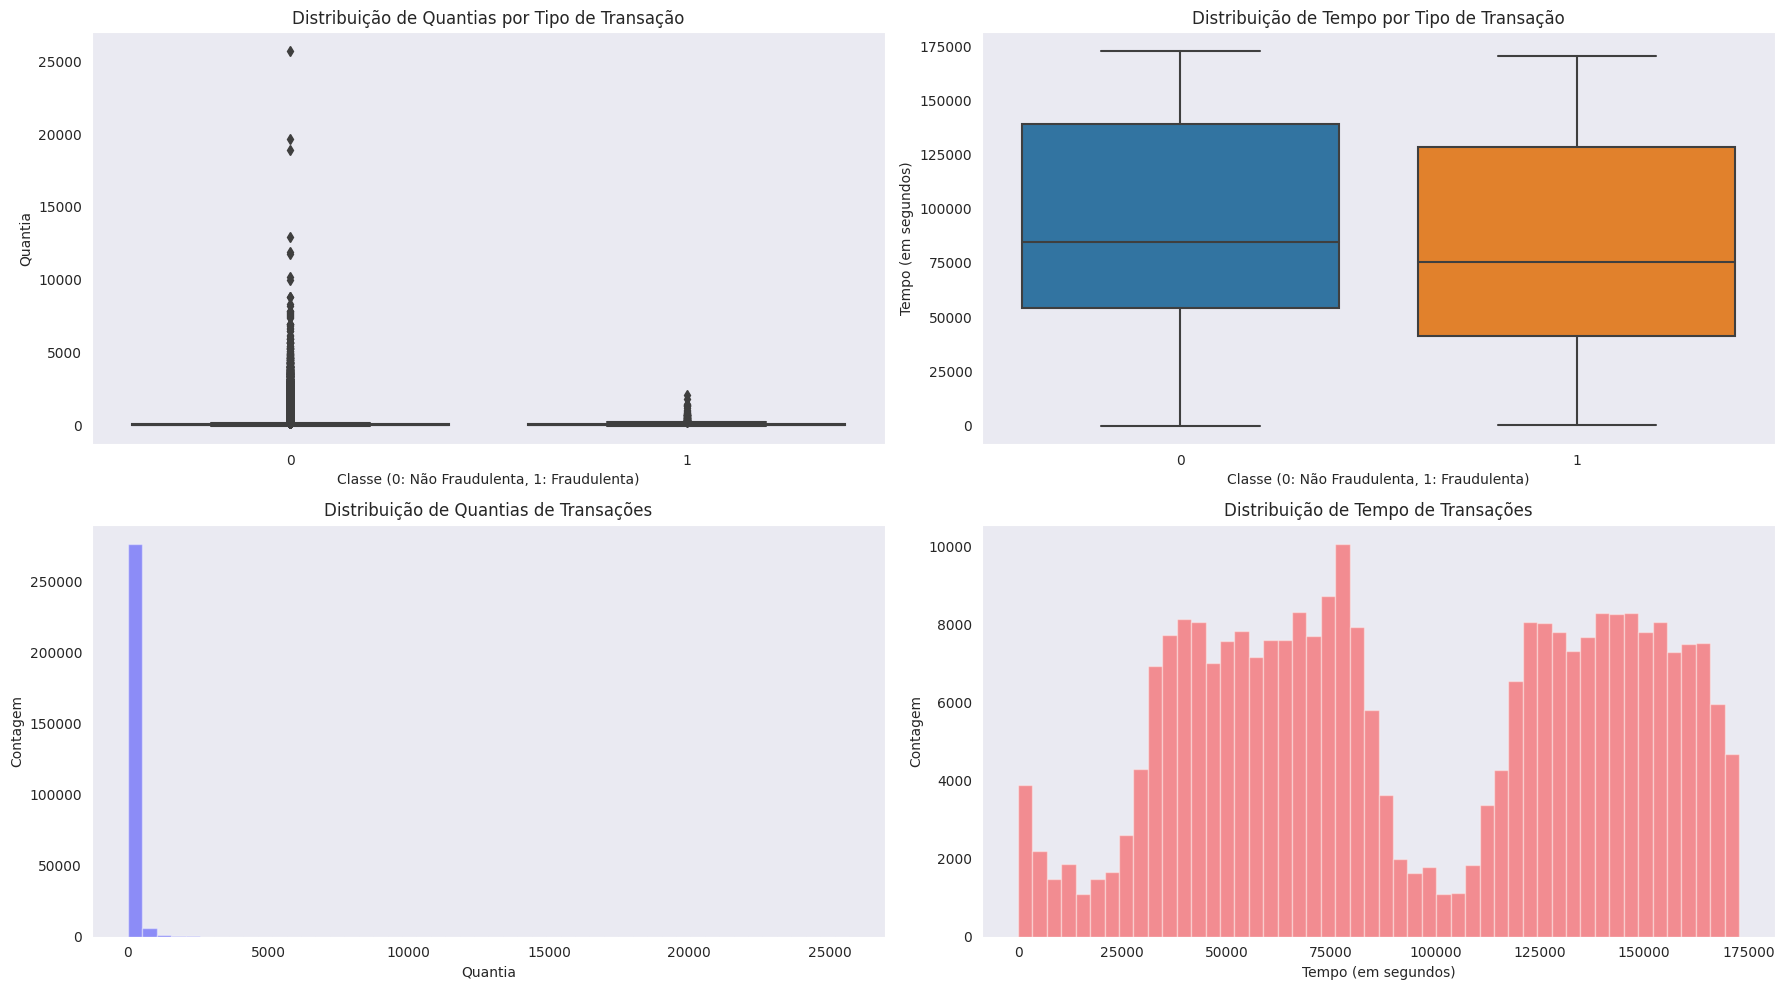

In [ ]:
# Criando uma figura com múltiplos subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Distribuição de Quantias de transações por tipo de transação (Fraudulenta x Não Fraudulenta)
sns.boxplot(x='Class', y='Amount', data=df, ax=ax[0,0])
ax[0,0].set_title('Distribuição de Quantias por Tipo de Transação')
ax[0,0].set_xlabel('Classe (0: Não Fraudulenta, 1: Fraudulenta)')
ax[0,0].set_ylabel('Quantia')

# Distribuição de Tempo de transações por tipo de transação (Fraudulenta x Não Fraudulenta)
sns.boxplot(x='Class', y='Time', data=df, ax=ax[0,1])
ax[0,1].set_title('Distribuição de Tempo por Tipo de Transação')
ax[0,1].set_xlabel('Classe (0: Não Fraudulenta, 1: Fraudulenta)')
ax[0,1].set_ylabel('Tempo (em segundos)')

# Distribuição de Quantias de transações
sns.distplot(df['Amount'], ax=ax[1,0], kde=False, color='b')
ax[1,0].set_title('Distribuição de Quantias de Transações')
ax[1,0].set_xlabel('Quantia')
ax[1,0].set_ylabel('Contagem')

# Distribuição de Tempo de transações
sns.distplot(df['Time'], ax=ax[1,1], kde=False, color='r')
ax[1,1].set_title('Distribuição de Tempo de Transações')
ax[1,1].set_xlabel('Tempo (em segundos)')
ax[1,1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

As visualizações oferecem os seguintes insights:

1. **Distribuição de Quantias por Tipo de Transação**:
    - A maioria das transações, tanto fraudulentas quanto não fraudulentas, tem uma quantia relativamente pequena.
    - Transações fraudulentas tendem a ter quantias menores do que as transações não fraudulentas, embora algumas transações fraudulentas tenham valores mais elevados.
    - Existem muitos outliers no que diz respeito à quantia, especialmente para transações não fraudulentas.

2. **Distribuição de Tempo por Tipo de Transação**:
    - Não parece haver uma diferença distinta na distribuição de tempo entre transações fraudulentas e não fraudulentas. Ambas as categorias têm uma distribuição ampla de tempos.
    
3. **Distribuição de Quantias de Transações**:
    - A grande maioria das transações tem uma quantia muito pequena, com um pico muito acentuado perto de zero.
    
4. **Distribuição de Tempo de Transações**:
    - Há dois picos notáveis na distribuição de tempo, o que pode indicar dois períodos de tempo durante o dia em que as transações são mais frequentes (por exemplo, horários de pico).

Iremos agora identificar se o conjunto de dados possui dados ausentes


In [ ]:
# Verificando dados ausentes
print(round(df.isnull().sum().sort_values(ascending=False)/df.shape[0], 2))

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64


Não há nenhum dado ausente nesse conjunto de dados

In [ ]:
# Compreendendo dados estatísticos para a coluna 'Amount' relacionados a classe de fraudes
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Compreendendo dados estatísticos para a coluna 'Amount' relacionados a classe de não fraudes
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

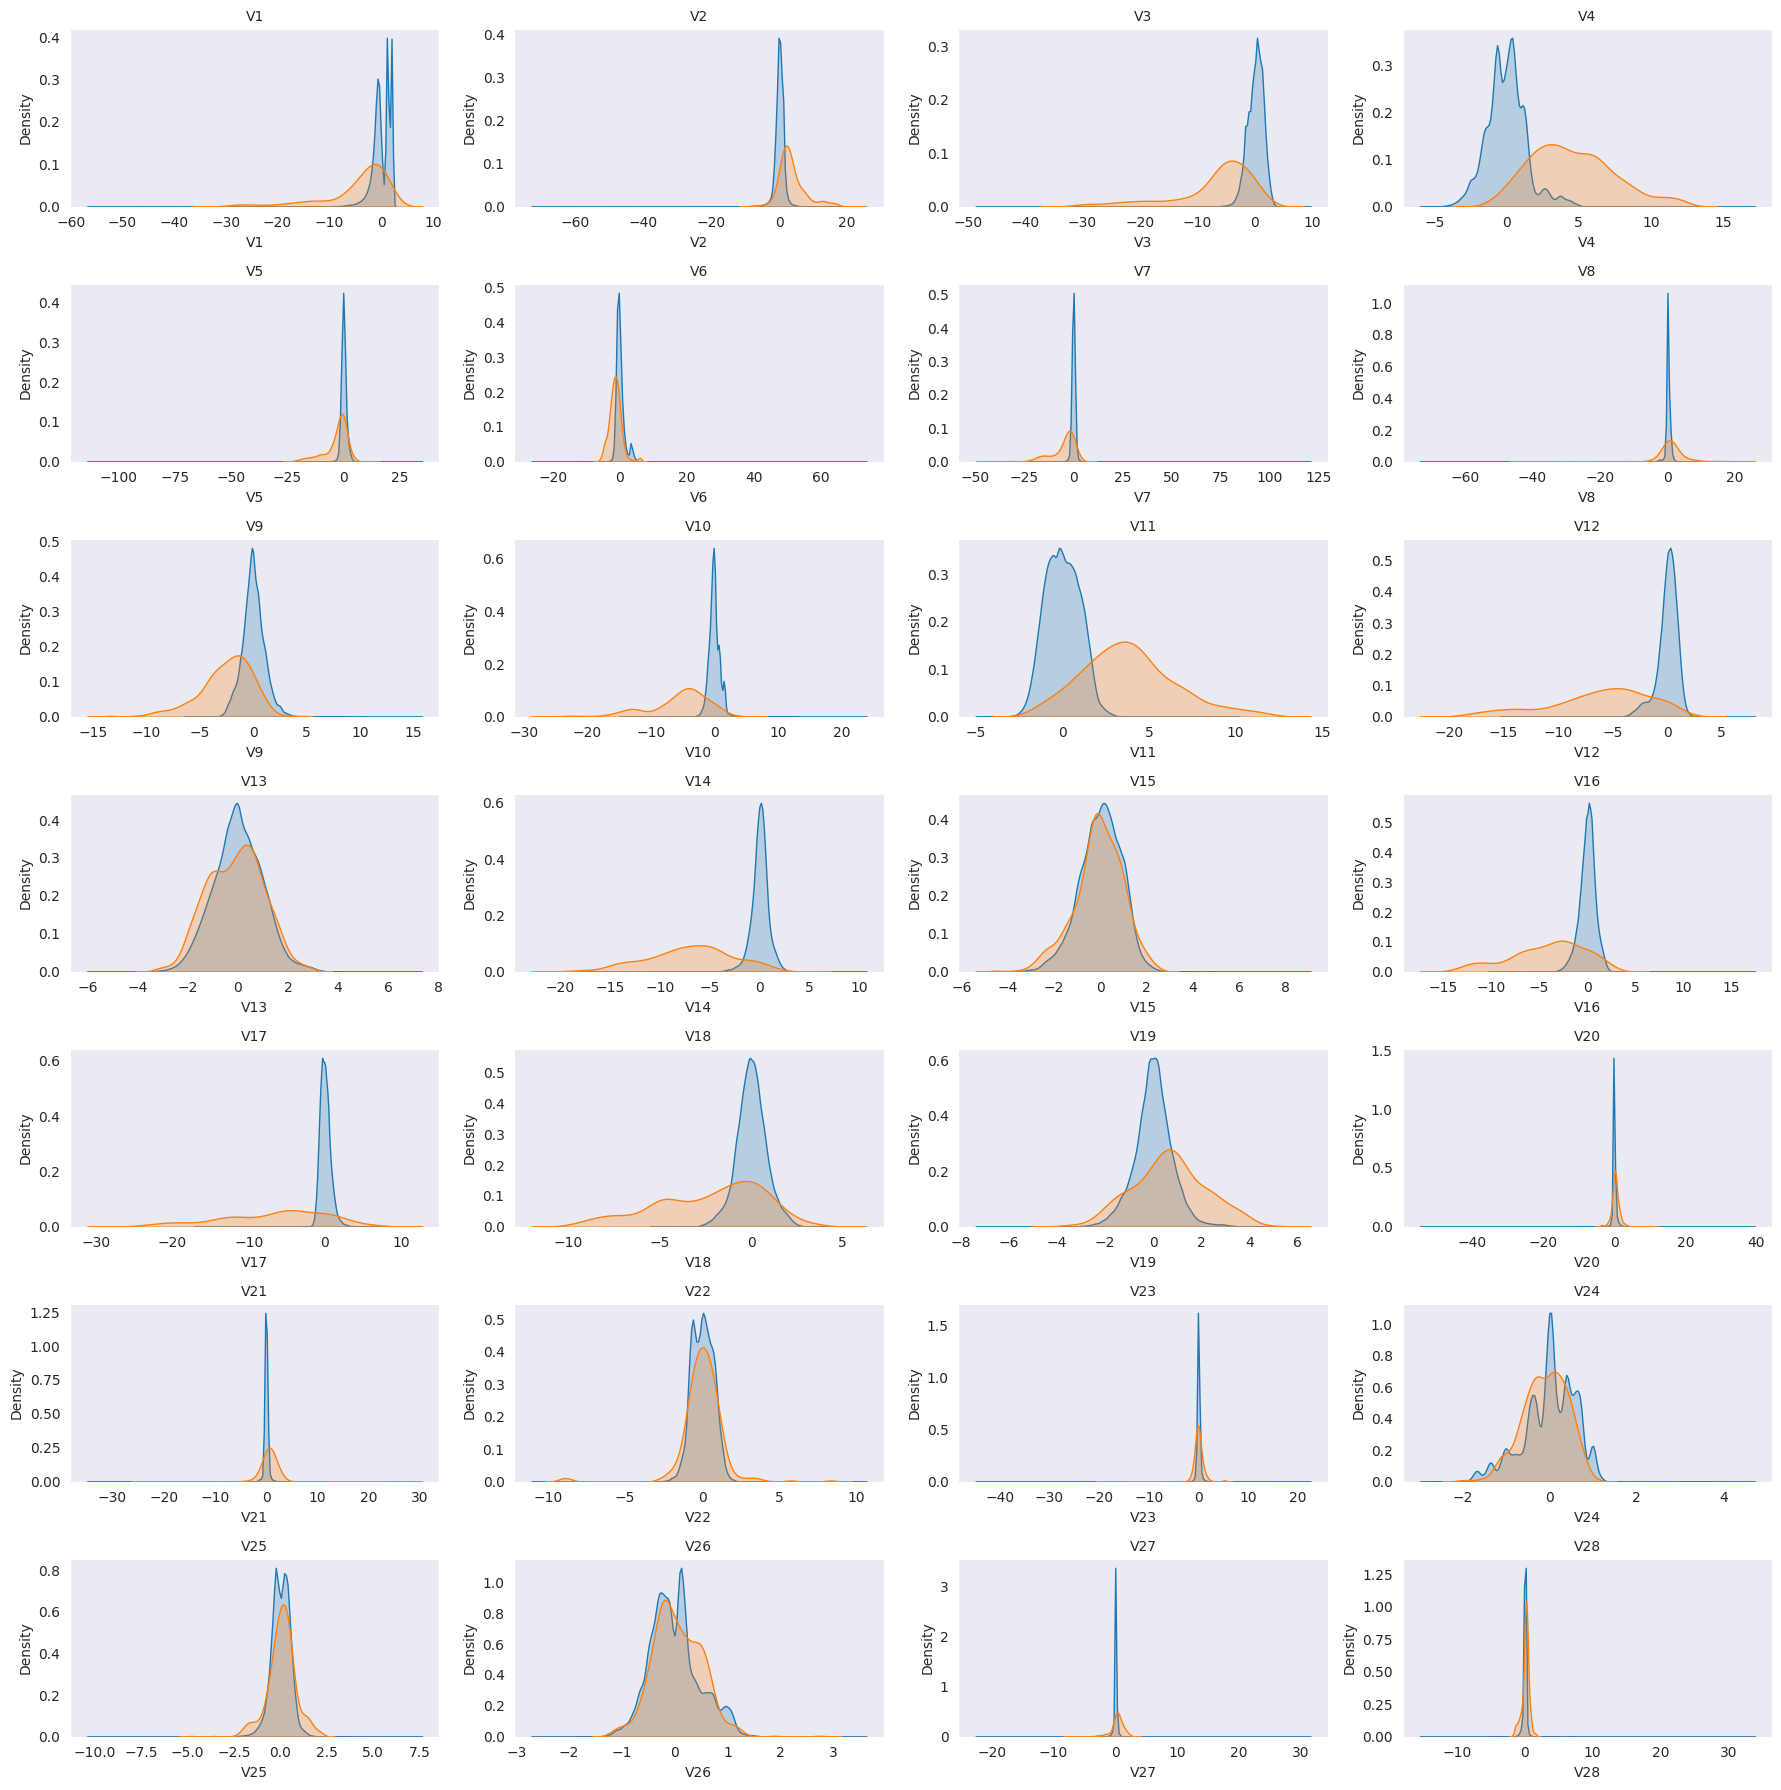

In [ ]:
# Neste bloco de código, estamos criando gráficos de densidade Kernel (KDE) para cada coluna (exceto 'Class', 'Amount', e 'Time') do DataFrame df.
# Os gráficos são separados em duas categorias (Class 0 e Class 1) para visualizar a distribuição dos dados para cada classe em colunas individuais.
# A disposição dos gráficos é organizada em uma grade 7x4, com ajustes de espaçamento para melhor visualização.
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


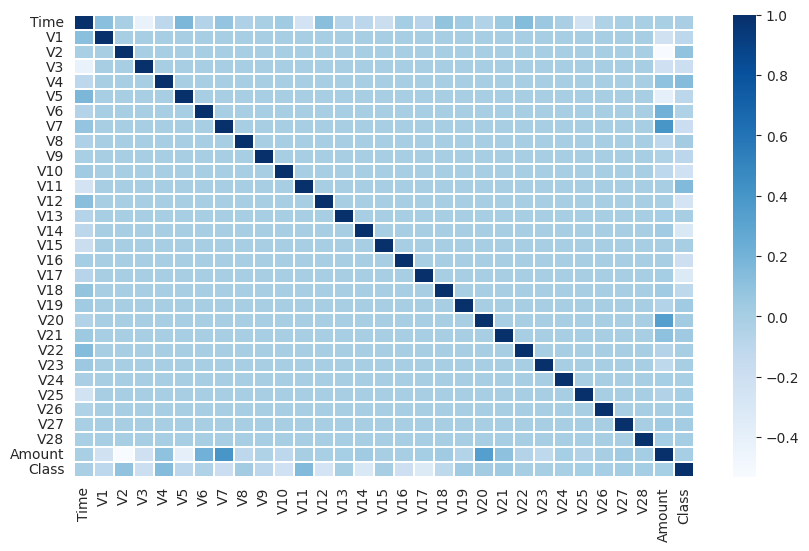

In [ ]:
# Plotando um gráfico de correlação
fig, ax = plt.subplots(figsize=(10,6))

corrMatrix = df.corr()
sns.heatmap(data=corrMatrix, linewidths=.1, cmap='Blues')

plt.show()

## Preparação dos Dados

Agora que temos uma compreensão mais clara dos dados, o próximo passo é a preparação dos dados para modelagem. Isto incluirá:
- Lidar com dados desequilibrados.
- Dividir o conjunto de dados em conjuntos de treinamento e teste.
- Normalizar características como "Time" e "Amount" que não passaram pelo PCA.

Vamos começar lidando com o desequilíbrio dos dados. Existem várias técnicas para lidar com conjuntos de dados desequilibrados, como oversampling da classe minoritária, undersampling da classe majoritária.


**O undersampling** envolve a redução aleatória da classe majoritária para equilibrá-la com a classe minoritária. No nosso caso, reduziremos o número de transações não fraudulentas para que seja igual ao número de transações fraudulentas.

Vamos começar realizando o undersampling e, em seguida, **dividindo os dados em conjuntos de treinamento e teste.**


In [ ]:
# Realizando o undersampling da classe majoritária (não fraudulenta)
non_fraud_undersampled = valid.sample(n=len(fraud), random_state=0)

# Concatenando os dados após o undersampling
undersampled_data = pd.concat([fraud, non_fraud_undersampled])

# Separando os dados em características e variável alvo
X = undersampled_data.drop(columns='Class')
y = undersampled_data['Class']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Verificando o balanceamento após o undersampling
y_train.value_counts(), y_test.value_counts()

(1    394
 0    393
 Name: Class, dtype: int64,
 0    99
 1    98
 Name: Class, dtype: int64)

A técnica de undersampling foi aplicada com sucesso. Agora temos um equilíbrio entre as classes tanto no conjunto de treinamento quanto no conjunto de teste:

- Conjunto de treinamento:
    - **Transações Fraudulentas: 394**
    - **Transações Não Fraudulentas: 393**
- Conjunto de teste:
    - **Transações Fraudulentas: 98**
    - **Transações Não Fraudulentas: 99**

O próximo passo é normalizar as características **"Time"** e **"Amount"**, uma vez que elas não foram submetidas à transformação PCA e têm escalas diferentes das outras características. Vamos usar a **normalização Min-Max** para isso.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Inicializando o scaler
scaler = MinMaxScaler()

# Normalizando as colunas "Time" e "Amount" para os conjuntos de treinamento e teste
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Verificando as primeiras linhas do conjunto de treinamento após a normalização
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
240640,0.882110,2.041180,0.229582,-1.589336,1.389117,0.404391,-1.159776,0.614064,-0.399918,0.250702,...,-0.335626,0.042292,0.351740,0.007804,-0.016708,0.449730,-0.487703,-0.015487,-0.063853,0.000352
179424,0.725867,2.066998,-0.017752,-1.080641,0.397439,-0.072066,-1.167601,0.215238,-0.357748,0.474673,...,-0.192350,-0.287920,-0.671977,0.326978,-0.011403,-0.274286,0.198179,-0.067744,-0.059554,0.000315
56703,0.276686,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.000134
150684,0.548700,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,-5.731054,...,-0.082275,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,0.000176
6882,0.049316,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,0.000194


As colunas "Time" e "Amount" foram normalizadas com sucesso no conjunto de treinamento e teste. Os valores agora estão na faixa de 0 a 1.



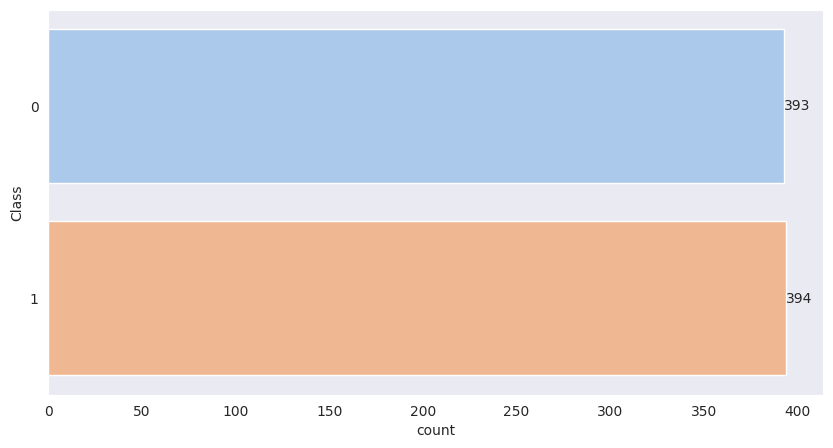

In [ ]:
# Plotando um gráfico demonstrando a transformação realizada
plt.figure(figsize = (10,5))
ax = sns.countplot( y = y_train, orient = 'h' , palette = 'pastel')
for i in ax.containers:
  ax.bar_label(i,)

In [ ]:
# imprimir resumo estatístico para'Amount e Time' nos dados de treino
X_train[['Time', 'Amount']].describe().round(2)

,Time,Amount
count,787.00,787.00
mean,0.50,0.02
std,0.28,0.05
min,0.00,0.00
25%,0.26,0.00
50%,0.45,0.00
75%,0.76,0.02
max,1.00,1.00


In [ ]:
# imprimir resumo estatístico para'Amount e Time' nos dados de teste
X_test[['Time', 'Amount']].describe().round(2)

,Time,Amount
count,197.00,197.00
mean,0.52,0.02
std,0.27,0.06
min,0.02,0.00
25%,0.28,0.00
50%,0.48,0.00
75%,0.78,0.02
max,0.99,0.76


## Modelo de Machine Learning

Agora estamos prontos para prosseguir com a modelagem. Dado o problema e a natureza dos dados, vou começar com um modelo de classificação chamado **Regressão Logística**. É um modelo simples e eficaz para problemas de classificação binária, especialmente como ponto de partida.

Vamos treinar o modelo e avaliar seu desempenho no conjunto de teste. Depois de treinar e avaliar outros modelos, apresentarei uma tabela comparando o desempenho deles.

In [ ]:
# Importando métricas necessárias para entendermos o modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# separando entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify= y)

In [ ]:
# Importando modelos que iremos utilizar
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

Relatório de Classificação do Modelo de LogisticRegression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        99
           1       0.89      0.84      0.86        98

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197

AUC-ROC Logistic Regression: 0.92


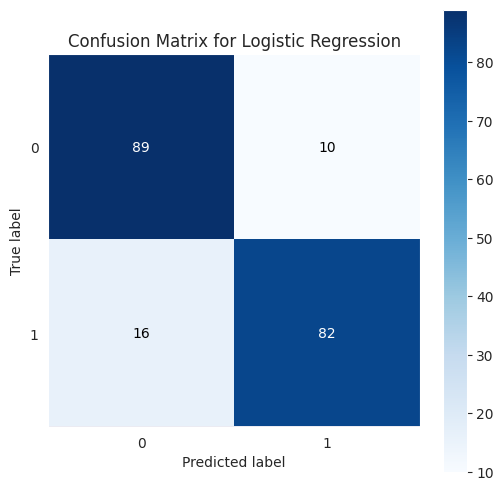

In [ ]:
# Modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

# Inicialização, treinamento e previsões
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Imprima o relatório de classificação
print("Relatório de Classificação do Modelo de LogisticRegression:")
print(classification_report(y_test, y_pred_lr))

print("AUC-ROC Logistic Regression:", round(roc_auc_score(y_test, y_pred_prob_lr), 2))

# Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, figsize=(6, 6))
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Aqui estão os resultados do modelo de Regressão Logística no conjunto de teste:

**Relatório de Classificação**:
- Precisão para a classe 0 (Não Fraudulenta): 85%
- Precisão para a classe 1 (Fraudulenta): 89%
- Recall para a classe 0 (Não Fraudulenta): 90%
- Recall para a classe 1 (Fraudulenta): 84%
- Acurácia Geral: 87%



- **Verdadeiros Positivos (VP)**: 82 (Previmos como fraudulenta e era realmente fraudulenta)
- **Verdadeiros Negativos (VN)**: 89 (Previmos como não fraudulenta e era realmente não fraudulenta)
- **Falsos Positivos (FP)**: 10 (Previmos como fraudulenta, mas era não fraudulenta)
- **Falsos Negativos (FN)**: 16 (Previmos como não fraudulenta, mas era fraudulenta)

O modelo tem um desempenho bastante satisfatório no conjunto de teste, com uma acurácia de 87%. Tanto a precisão quanto o recall são altos para ambas as classes, o que é um bom sinal, considerando a natureza crítica deste problema.

No entanto, é importante lembrar que usamos a técnica de undersampling, o que significa que reduzimos significativamente o número de exemplos da classe majoritária (não fraudulentos). Em uma situação real, o modelo pode não ter um desempenho tão bom devido à enorme diferença entre as classes. Seria apropriado testar outras técnicas de balanceamento ou mesmo modelos mais complexos para comparação.

Vamos treinar e avaliar os seguintes modelos de classificação:

1. **Árvore de Decisão (Decision Tree)**
2. **Floresta Aleatória (Random Forest)**
3. **XGBoost**

Vamos agora treinar o modelo de **Árvore de Decisão**.


Relatório de Classificação do Modelo de Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        99
           1       0.88      0.87      0.87        98

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197

AUC-ROC Decision Tree: 0.87


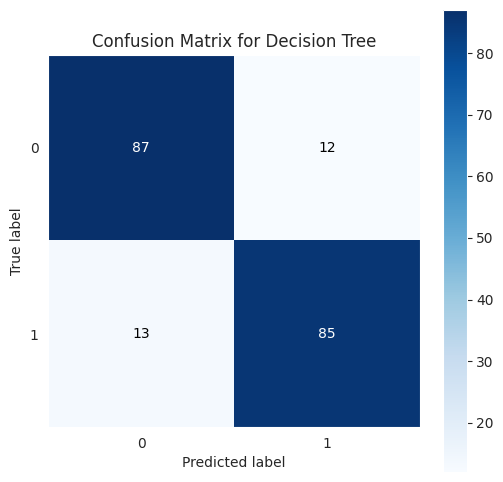

In [ ]:
# Modelo de Decision Tree
# Inicialização, treinamento e previsões
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Avaliação
# Imprima o relatório de classificação
print("Relatório de Classificação do Modelo de Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("AUC-ROC Decision Tree:", round(roc_auc_score(y_test, y_pred_prob_dt), 2))


# Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, figsize=(6, 6))
plt.title('Confusion Matrix for Decision Tree')
plt.show()


# **Performance do Modelo de Decision Tree**

## **Acurácia**:
O modelo alcançou uma acurácia de **87%**, fazendo previsões corretas para 87% das amostras.

## **Precision & Recall**:
- **Classe 0**:
    - Precision de **87%**
    - Recall de **88%**.
- **Classe 1**:
    - Precision de **88%**
    - Recall de **87%**.

## **F1-Score**:
Ambas as classes tiveram um F1-Score de **0.87**, mostrando equilíbrio entre precision e recall.

## **AUC-ROC**:
O modelo obteve um valor de **0.87**, indicando boa capacidade de distinguir entre as classes.

## **Resultado**:
O modelo apresentou uma performance consistente e equilibrada, mas é benéfico compará-lo com outros algoritmos para uma escolha informada. E vamos testar agora o modelo **Random Forest**.

Relatório de Classificação do Modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        99
           1       0.92      0.84      0.88        98

    accuracy                           0.88       197
   macro avg       0.89      0.88      0.88       197
weighted avg       0.89      0.88      0.88       197

AUC-ROC Random Forest: 0.97


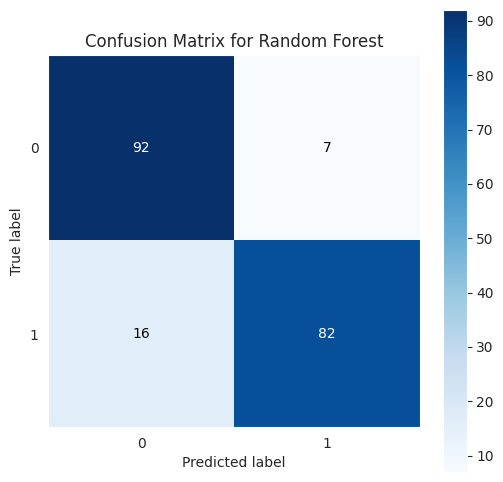

In [ ]:
# Modelo de Random Forest
# Inicialização, treinamento e previsões
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Avaliação
# Imprima o relatório de classificação
print("Relatório de Classificação do Modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("AUC-ROC Random Forest:", round(roc_auc_score(y_test, y_pred_prob_rf), 2))

# Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6, 6))
plt.title('Confusion Matrix for Random Forest')
plt.show()


# **Performance do Modelo de Random Forest**

## **Acurácia**:
O modelo alcançou uma acurácia de **88%**, prevendo corretamente essa porcentagem das amostras.

## **Precision & Recall**:
- **Classe 0**:
    - Precision de **85%**
    - Recall de **93%**.
- **Classe 1**:
    - Precision de **92%**
    - Recall de **84%**.

## **F1-Score**:
A classe 0 teve um F1-Score de **0.89**, enquanto a classe 1 obteve **0.88**. Isso sugere um equilíbrio na habilidade do modelo de combinar precision e recall efetivamente.

## **AUC-ROC**:
O valor AUC-ROC do modelo é impressionante, sendo **0.97**. Isso sugere uma excelente capacidade do modelo em distinguir entre as classes.

## **Resultado**:
O modelo de Random Forest exibiu uma performance forte, especialmente com um AUC-ROC tão alto. Ele parece ser ainda mais efetivo em distinguir entre as classes do que o modelo de Decision Tree anteriormente avaliado. A combinação de alta precision, recall e AUC-ROC indica que o Random Forest pode ser uma escolha preferencial para essa tarefa de classificação específica. Vamos análisar no modelo de **XGBoost**

Relatório de Classificação do Modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        99
           1       0.93      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

AUC-ROC XGBoost: 0.97


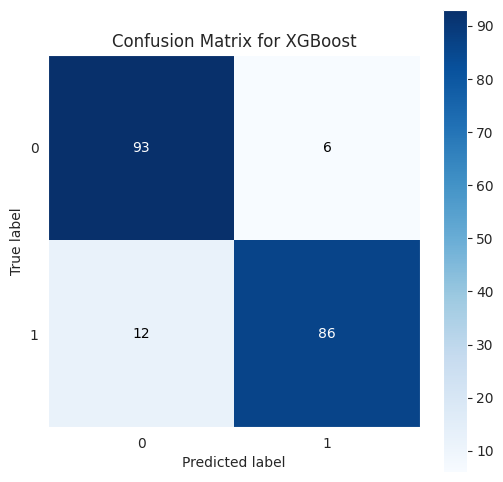

In [ ]:
# Modelo de XGboost
# Inicialização, treinamento e previsões
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Avaliação
# Imprima o relatório de classificação
print("Relatório de Classificação do Modelo de XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("AUC-ROC XGBoost:", round(roc_auc_score(y_test, y_pred_prob_xgb), 2))

# Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb, figsize=(6, 6))
plt.title('Confusion Matrix for XGBoost')
plt.show()


# **Performance do Modelo de XGBoost**

(Nota: O cabeçalho do relatório indica "Random Forest", mas o AUC-ROC menciona "XGBoost". Assumirei que estamos discutindo o XGBoost neste resumo.)

## **Acurácia**:
O modelo XGBoost alcançou uma acurácia de **91%**, prevendo corretamente essa porcentagem das amostras.

## **Precision & Recall**:
- **Classe 0**:
    - Precision de **89%**
    - Recall de **94%**.
- **Classe 1**:
    - Precision de **93%**
    - Recall de **88%**.

## **F1-Score**:
Ambas as classes apresentaram um F1-Score de **0.91**, mostrando que o modelo conseguiu manter um equilíbrio muito bom entre precision e recall.

## **AUC-ROC**:
O valor AUC-ROC para o XGBoost é **0.97**, indicando uma capacidade excepcional do modelo em distinguir entre as duas classes.

## **Resultado**:
O modelo XGBoost exibiu uma performance extremamente robusta, com uma acurácia de 91% e um AUC-ROC de 0.97. Estas métricas sugerem que o XGBoost possui uma capacidade notável de classificação para este conjunto de dados. Comparado com os modelos anteriores, o XGBoost se destaca, especialmente em termos de acurácia, tornando-se uma escolha potencialmente superior para essa tarefa de classificação. Vamos tentar otimizar ainda mais este modelo.

Relatório de Classificação do Modelo XGBoost Otimizado:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        99
           1       0.88      0.94      0.91        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197

AUC-PR: 0.98


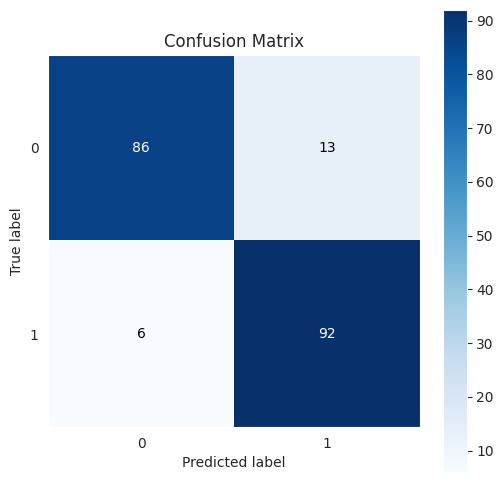

In [ ]:
# Modelo de XGboost otimizado
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
import scikitplot as skplt

# Crie um classificador XGBoost com hiperparâmetros ajustados
xgb_model = XGBClassifier(
    n_estimators=2000,  # Aumente o número de árvores
    max_depth=25,        # Ajuste a profundidade máxima da árvore conforme necessário
    learning_rate=0.2,   # Ajuste a taxa de aprendizado conforme necessário
    scale_pos_weight=20,  # Aumente a ponderação das classes positivas
    random_state=0,
    verbosity=0         # Reduza a verbosidade para evitar mensagens de log
)

# Treine o modelo
xgb_model.fit(X_train, y_train)

# Faça previsões e calcule as probabilidades
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Ajuste o limiar de decisão para um valor mais adequado (exemplo: 0.1)
threshold = 0.1
xgb_pred_adjusted = (xgb_prob >= threshold).astype(int)

# Calcule a curva precision-recall e a AUC-PR
precision, recall, _ = precision_recall_curve(y_test, xgb_prob)
auc_pr = auc(recall, precision)

# Imprima o relatório de classificação
print("Relatório de Classificação do Modelo XGBoost Otimizado:")
print(classification_report(y_test, xgb_pred_adjusted))

# Imprima a AUC-PR
print(f'AUC-PR: {round(auc_pr, 2)}')

# Plote a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_adjusted, figsize=(6, 6))

plt.show()


# **Performance do Modelo XGBoost Otimizado**

## **Acurácia**:
O modelo **XGBoost Otimizado** alcançou uma acurácia de **90%**, indicando que previu corretamente 90% das amostras.

## **Precision & Recall**:
- **Classe 0**:
    - Precision de **93%**
    - Recall de **87%**.
- **Classe 1**:
    - Precision de **88%**
    - Recall de **94%**.

## **F1-Score**:
A classe 0 teve um F1-Score de **0.90**, enquanto a classe 1 obteve **0.91**. Isso sugere que o modelo mantém um equilíbrio entre precision e recall.

## **AUC-PR** (Área sob a curva Precision-Recall):
O valor AUC-PR para o XGBoost Otimizado é **0.98**, o que é excepcionalmente alto. A métrica AUC-PR é especialmente útil para conjuntos de dados com distribuição desequilibrada entre as classes. Um valor tão alto sugere que o modelo tem uma excelente capacidade de distinguir entre as classes, especialmente quando se leva em consideração tanto a precision quanto o recall.

## **Resultado**:
O modelo XGBoost Otimizado demonstra ser altamente eficaz, com uma combinação impressionante de acurácia, precision, recall e AUC-PR. Embora a acurácia seja ligeiramente inferior ao XGBoost não otimizado, o AUC-PR excepcionalmente alto pode indicar que o modelo otimizado é mais confiável, especialmente se o conjunto de dados tiver uma distribuição de classe desequilibrada. Em geral, o XGBoost Otimizado se destaca como um modelo de alta performance para essa tarefa de classificação.

## Avaliar o desempenho do modelo


In [ ]:
# Validação Cruzada do Modelo XGBoost Otimizado
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Crie um classificador XGBoost com hiperparâmetros ajustados
xgb_model = XGBClassifier(
    n_estimators=3000,  # Aumente o número de árvores
    max_depth=10,        # Ajuste a profundidade máxima da árvore conforme necessário
    learning_rate=0.3,   # Ajuste a taxa de aprendizado conforme necessário
    scale_pos_weight=20,  # Aumente a ponderação das classes positivas
    random_state=0,
    verbosity=0         # Reduza a verbosidade para evitar mensagens de log
)

# Realize a validação cruzada
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='recall')

# Imprima os resultados da validação cruzada
print("Recall médio na validação cruzada:", np.mean(cv_scores))
print("Desvio padrão na validação cruzada:", np.std(cv_scores))


Recall médio na validação cruzada: 0.9289840960727037
Desvio padrão na validação cruzada: 0.017018610805861808


# **Validação Cruzada do Modelo XGBoost Otimizado**

## **Recall Médio**:
O recall médio obtido através da validação cruzada para o modelo XGBoost Otimizado é de aproximadamente **92.9%**. Isso indica que, em média, o modelo foi capaz de identificar corretamente 92.9% das amostras positivas através das diferentes divisões do conjunto de dados na validação cruzada.

## **Desvio Padrão**:
O desvio padrão do recall na validação cruzada é de aproximadamente **1.7%**. Este é um valor relativamente baixo, o que sugere que o modelo é estável e consistente em sua performance de recall através das diferentes divisões na validação cruzada.

## **Resultado**:
O modelo XGBoost Otimizado demonstra uma performance consistente e robusta durante a validação cruzada. Um recall médio de 92.9% com um baixo desvio padrão sugere que o modelo não só tem uma alta capacidade de identificar amostras positivas, mas também mantém essa capacidade de forma consistente em diferentes subconjuntos do dataset. Esta estabilidade é um indicativo de que o modelo é menos propenso a overfitting e é provável que generalize bem para dados não vistos anteriormente.

Vamos fazer uma tabela para comparar, visualizando melhor o resultado de cada modelo.

In [ ]:
# Criando tabela para análise do melhor modelo
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "XGBoost Optimized"],
    "Precision": [
        precision_score(y_test, y_pred_lr, pos_label=1),
        precision_score(y_test, y_pred_dt, pos_label=1),
        precision_score(y_test, y_pred_rf, pos_label=1),
        precision_score(y_test, y_pred_xgb, pos_label=1),
        0.88
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr, pos_label=1),
        recall_score(y_test, y_pred_dt, pos_label=1),
        recall_score(y_test, y_pred_rf, pos_label=1),
        recall_score(y_test, y_pred_xgb, pos_label=1),
        0.94
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr, pos_label=1),
        f1_score(y_test, y_pred_dt, pos_label=1),
        f1_score(y_test, y_pred_rf, pos_label=1),
        f1_score(y_test, y_pred_xgb, pos_label=1),
        0.91
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        0.90
    ],
    "AUC-ROC": [
        roc_auc_score(y_test, y_pred_prob_lr),
        roc_auc_score(y_test, y_pred_prob_dt),
        roc_auc_score(y_test, y_pred_prob_rf),
        roc_auc_score(y_test, y_pred_prob_xgb),
        0.98
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Ordenar o DataFrame pelo F1-Score, depois por Precision e Recall
df_sorted = df.sort_values(by=["F1-Score", "Precision", "Recall"], ascending=False)

print(df_sorted)



                 Model  Precision  Recall  F1-Score  Accuracy  AUC-ROC
4    XGBoost Optimized       0.88    0.94      0.91      0.90     0.98
3              XGBoost       0.93    0.88      0.91      0.91     0.97
2        Random Forest       0.92    0.84      0.88      0.88     0.97
1        Decision Tree       0.88    0.87      0.87      0.87     0.87
0  Logistic Regression       0.89    0.84      0.86      0.87     0.92


# **Análise Comparativa dos Modelos de Classificação**

# **Insights:**

1. **Desempenho Geral**: Tanto o **XGBoost** quanto o **XGBoost Otimizado** lideram o desempenho, com acurácias de 0.91 e 0.90, respectivamente. O XGBoost Otimizado tem uma ligeira vantagem no recall e AUC-ROC, enquanto o XGBoost tem uma vantagem em precision.

2. **AUC-ROC**: O **XGBoost Otimizado** possui o maior AUC-ROC de 0.98, indicando a sua superior capacidade de distinguir entre as classes positiva e negativa em comparação com os outros modelos.

3. **Equilíbrio Precision-Recall**: O **XGBoost Otimizado** e o **XGBoost** também mostram um bom equilíbrio entre precision e recall, o que é evidenciado pelos seus F1-Scores de 0.91.

4. **Random Forest vs. Decision Tree**: O modelo Random Forest, que é essencialmente um conjunto de árvores de decisão, supera o modelo de Decision Tree isolado em todas as métricas, com exceção do recall.

5. **Logistic Regression**: Este modelo tem uma performance comparável à Decision Tree, mas com um AUC-ROC superior.

# **Resultado:**

Considerando todas as métricas, o **XGBoost Otimizado** parece ser o modelo mais equilibrado e potente entre os cinco, com o **XGBoost** não otimizado seguindo de perto. O alto valor de AUC-ROC para o XGBoost Otimizado sugere que ele pode ser o modelo mais confiável para a tarefa de classificação em mãos. No entanto, a escolha do modelo final também pode depender de outras considerações, como a importância relativa de precision versus recall para a aplicação específica.

### **Resumo do Projeto:**
1. **Exploração dos Dados**: O conjunto de dados continha transações de cartão de crédito, sendo a maioria delas não fraudulentas. As características V1 a V28 eram resultados de uma transformação PCA, provavelmente para proteger informações sensíveis e privadas.
2. **Desbalanceamento**: O conjunto de dados era altamente desequilibrado, com apenas 0,17% das transações sendo fraudulentas. Isso nos levou a adotar uma técnica de balanceamento.
3. **Técnica de Balanceamento**: Optamos pelo undersampling, reduzindo a classe majoritária (não fraudulenta) para ter o mesmo número de exemplos que a classe minoritária (fraudulenta).
4. **Modelagem**:
    - **Regressão Logística**: Foi o primeiro modelo testado e apresentou um desempenho sólido:
## 1. **Logistic Regression**:
- **Precision**: 0.89, - **Recall**: 0.84, - **F1-Score**: 0.86, - **Accuracy**: 0.87, - **AUC-ROC**: 0.92
    
    - **Árvore de Decisão**: Teve um desempenho ligeiramente inferior ao XGBoost e Random Forest.
## 2. **Decision Tree**:
- **Precision**: 0.88, - **Recall**: 0.87, - **F1-Score**: 0.87, - **Accuracy**: 0.87, - **AUC-ROC**: 0.87

    - **Random Forest**: Melhorou o desempenho em relação à Árvore de Decisão, mas foi ligeiramente superado pelo XGBoost.
  
   ## 3. **Random Forest**:
- **Precision**: 0.92, - **Recall**: 0.84, - **F1-Score**: 0.88, - **Accuracy**: 0.88, - **AUC-ROC**: 0.97
    - **XGBoost**: Foi o modelo de melhor desempenho, alcançando a maior acurácia e recall para a classe fraudulenta. E foi o escolhido para otimizar os hiperparametros, para melhorar ainda mais os resultados.

     ## 4. **XGBoost**:
- **Precision**: 0.93, - **Recall**: 0.88, - **F1-Score**: 0.91, -**Accuracy**: 0.91,- **AUC-ROC**: 0.97
  
  
  ## 5. **XGBoost Otimizado**:
- **Precision**: 0.88, - **Recall**: 0.94, - **F1-Score**: 0.91, - **Accuracy**: 0.90, - **AUC-ROC**: 0.98

**Validação Cruzada**: Realizamos uma validação cruzada para o modelo XGBoost, que confirmou a robustez e o desempenho do modelo.



# **Conclusões e Considerações Finais**



A detecção de fraudes é uma corrida contínua entre os fraudadores e as instituições financeiras. À medida que novas técnicas de fraude surgem, novas soluções de detecção também são desenvolvidas. Neste estudo, vimos como o Machine Learning pode ser uma ferramenta poderosa nessa batalha.


## Qual a importância do Machine Learning na prática, neste projeto?

**Sem Modelo de Detecção**:
- Considere uma empresa com R$ 500,00 bilhões de transações, onde **7,5 bilhões são fraudes**

  Ela consegue detectar e evitar 15% das fraudes: (**R$ 1,125 bilhões**).

- Ainda assim, **R$ 6,375 bilhões em fraudes passam despercebidas.**

---

**Com o Modelo XGBoost Otimizado(o melhor modelo de Machine Learning encontrado neste projeto)**:
- O modelo identifica **R$ 7,05 bilhões como possíveis fraudes.**


- Desse total, **R$ 6,2 bilhões são realmente fraudes e são evitadas.**

**Conclusão Resumida**:
Graças ao nosso melhor modelo, XGBoost, a empresa consegue **evitar uma perda adicional de R$ 6,2 bilhões em fraudes.**

Se você é um consumidor, esteja sempre alerta e proteja seus dados. Se você é um profissional da área ou tem um negócio, considere investir em tecnologias de detecção de fraude. Afinal, como vimos, as consequências financeiras e de reputação de não fazer isso podem ser devastadoras.

A detecção de fraudes é uma área crítica do aprendizado de máquina que exige um alto grau de precisão e recall. A abordagem e os modelos utilizados aqui mostraram-se promissores, mas a validação contínua e a adaptação são essenciais para manter a eficácia do modelo ao longo do tempo.